\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-3
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

## Find
Sketch a free-body diagram of each element in the figure above. Compute the magnitude and direction of each force using an algebraic or vector method.

## Solution
The overall structure has a free body diagram like so,

\begin{center}
\includegraphics{images/fig2}
\end{center}

Separating the structure into individual elements would yield more equations to solve the system,

\begin{center}
\includegraphics{images/fig3} \\
Link 2
\end{center}

\begin{center}
\includegraphics{images/fig4} \\
Link 3
\end{center}

The $800\ N$ force is a point load, which means it can only be applied to one link. This is why the load is shown in one FBD and not the other. Changing the link the point load is applied to will change the values for $F_1$ and $F_2$, but it will not change the values of the reactions at $O$ and $A$.

In [2]:
v = Ox, Oy, Ax, Ay, F1, F2 = sp.symbols('O_x O_y A_x A_y F_1 F_2')
y, x = sp.S(0.9), sp.S(0.9)/sp.tan(60*sp.pi/180)  # Vertical and horizontal distance of the structure

# Overall structure equations
eq1 = sp.Eq(Ox + Ax, 800)  # Sum in x
eq2 = sp.Eq(Oy - Ay, 0)  # Sum in y
eq3 = sp.Eq(-Ay*x + 800*y, 0)  # Sum the moments about O

# Link 2 equations
eq4 = sp.Eq(Ox + F1, 800)  # Sum in x
eq5 = sp.Eq(Oy, F2)  # Sum in y
eq6 = sp.Eq(F1*y, 800*y)  # Sum the moments about O

# Link 3 equations (don't need to use and still get the same answer)
# eq4 = sp.Eq(Ax, F1)
# eq5 = sp.Eq(Ay, F2)
# eq6 = sp.Eq(F2*x, F1*y)

eqs = [eval(f'eq{i}') for i in range(1, 7)]

display(Markdown('**Equations:**'))
for eq in eqs:
    display(eq)
display(Markdown('---'))

A, b = sp.linear_eq_to_matrix(eqs, v)
matrix_eqn = sp.Eq(sp.MatMul(A, sp.Matrix(v)), b)
display(matrix_eqn)
display(Markdown('---'))

sol = sp.solve(matrix_eqn)
display(Markdown('**Solution:**'))
for val in v:
    display(sp.Eq(val, sol[val]))

**Equations:**

Eq(A_x + O_x, 800)

Eq(-A_y + O_y, 0)

Eq(-0.3*sqrt(3)*A_y + 720.0, 0)

Eq(F_1 + O_x, 800)

Eq(O_y, F_2)

Eq(0.9*F_1, 720.0)

---

Eq(Matrix([
[1, 0, 1,            0,   0,  0],
[0, 1, 0,           -1,   0,  0],
[0, 0, 0, -0.3*sqrt(3),   0,  0],
[1, 0, 0,            0,   1,  0],
[0, 1, 0,            0,   0, -1],
[0, 0, 0,            0, 0.9,  0]])*Matrix([
[O_x],
[O_y],
[A_x],
[A_y],
[F_1],
[F_2]]), Matrix([
[   800],
[     0],
[-720.0],
[   800],
[     0],
[ 720.0]]))

---

**Solution:**

Eq(O_x, 0.0)

Eq(O_y, 1385.6406460551)

Eq(A_x, 800.0)

Eq(A_y, 1385.6406460551)

Eq(F_1, 800.0)

Eq(F_2, 1385.6406460551)

The internal stresses of each link may be found by using the method of sections.

\begin{center}
\includegraphics{images/fig5} \\
Upper Section Cut
\end{center}

\begin{center}
\includegraphics{images/fig6} \\
Lower Section Cut
\end{center}

In [3]:
F_OB, F_AB = sp.symbols(r'F_{OB} F_{AB}')

# Upper section equations
eq7 = sp.Eq(F_AB*sp.cos(sp.pi/3), 800)  # Sum in x
eq8 = sp.Eq(F_OB, F_AB*sp.sin(sp.pi/3))  # Sum in y

display(eq7)
display(eq8)
display(Markdown('---'))

sol = sp.solve([eq7, eq8])

for val in [F_OB, F_AB]:
    display(sp.Eq(val, sol[val].n()))

Eq(F_{AB}/2, 800)

Eq(F_{OB}, sqrt(3)*F_{AB}/2)

---

Eq(F_{OB}, 1385.6406460551)

Eq(F_{AB}, 1600.0)

Link 2 is in compression and link 3 is in tension.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-5
## Given

\begin{center}
\includegraphics[scale=1.5]{images/fig7}
\end{center}

## Find
Find the reactions at the supports and plot the shear and bending moment diagrams.

## Solution
Due to the large amount of practice, this problem is quite simple and can be plotted instantly without showing calculation.

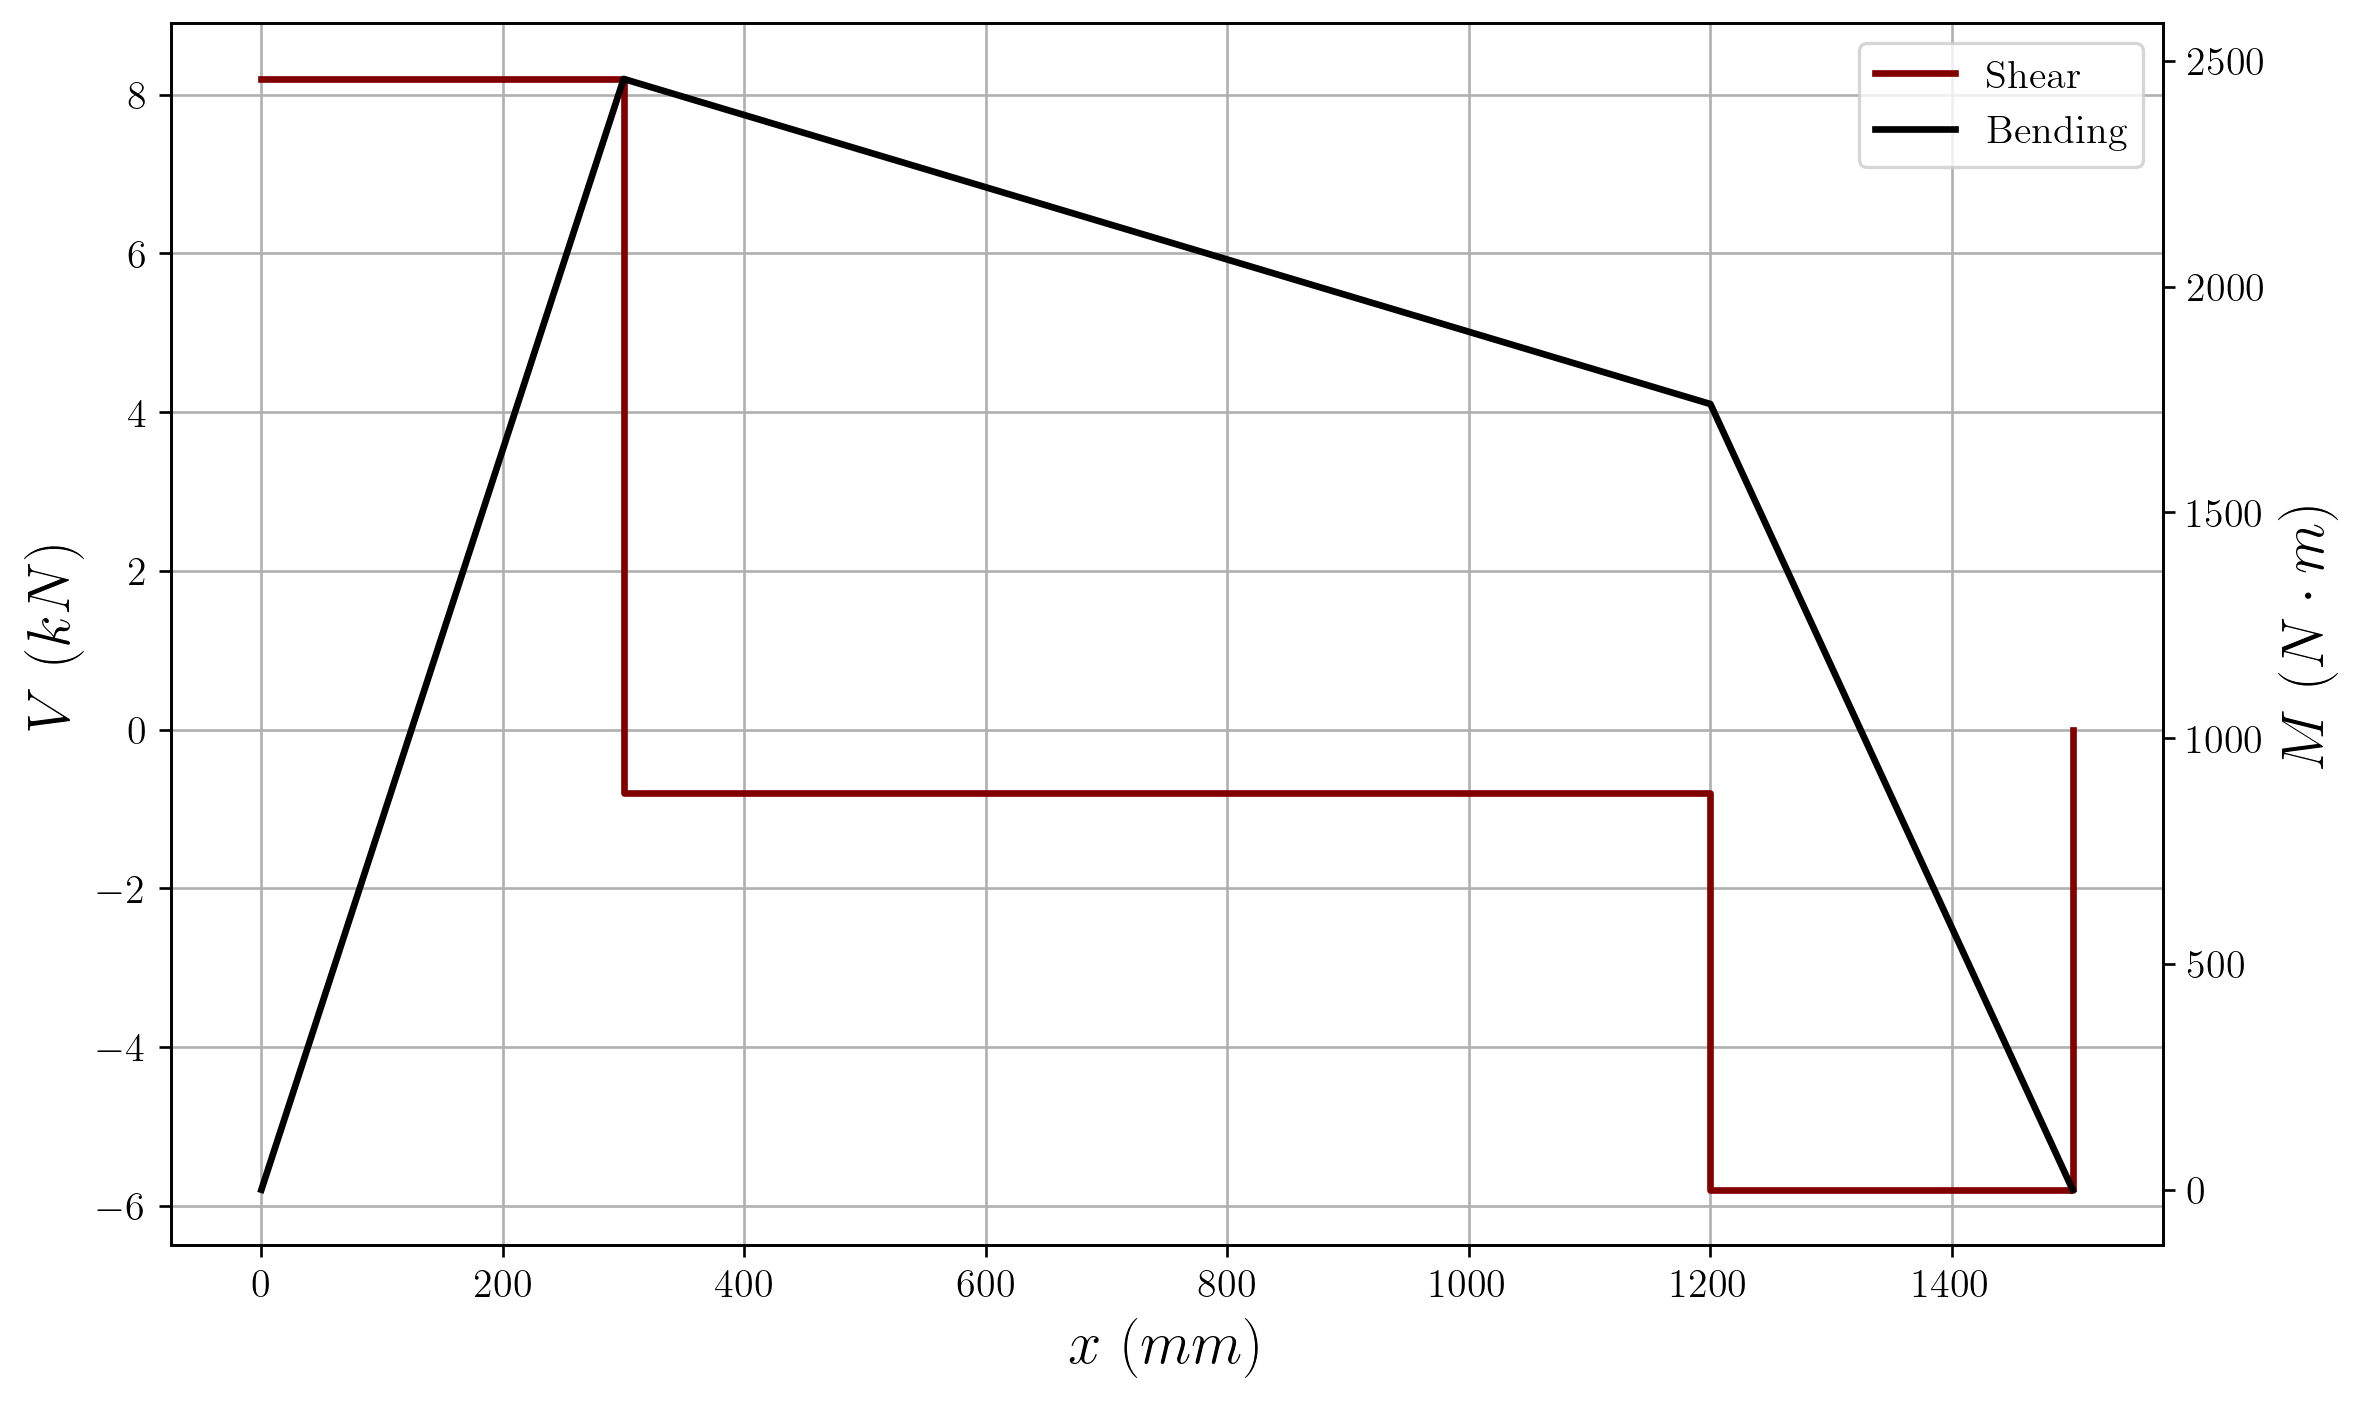

In [4]:
O, A, B, C = 0, 300, 300 + 900, 300 + 900 + 300
V_O, V_A, V_B, V_C = 8.2, 8.2 - 9, 8.2 - 9 - 5, 0  # Values shortly after cross the point
M_O, M_A, M_B, M_C = 0, V_O*300, V_O*300 + V_A*900, V_O*300 + V_A*900 + V_B*300

x = [O, A, A, B, B, C, C]
V = [V_O, V_O, V_A, V_A, V_B, V_B, V_C]
x_bending = [0, A, B, C]
M = [M_O, M_A, M_B, M_C]

fig, shear = plt.subplots()
bend = shear.twinx()

shear.plot(x, V, label='Shear')

shear.set_xlabel('$x$ ($mm$)')
shear.set_ylabel('$V$ ($kN$)')

bend.plot(x_bending, M, label='Bending', color='black')
bend.set_ylabel(r'$M$ ($N\cdot m$)')
bend.grid(visible=False)

shear.legend(handles=[shear.lines[0], bend.lines[0]], labels=['Shear', 'Bending'])

plt.show()

Notice that the plot above has a dual y-axis.

The values at the points are (shortly after for the shear values),

* $V_O=8.2\ kN$, $M_O=0\ N\cdot m$
* $V_A=-0.8\ kN$, $M_A=2460\ N\cdot m$
* $V_B=-5.8\ kN$, $M_B=1740\ N\cdot m$
* $V_C=0\ kN$, $M_C=0\ N\cdot m$

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-15
## Given
Plane stress values,

a. $\sigma_x=20\ kpsi$, $\sigma_y=-10\ kpsi$, and $\tau_{xy}=8\ kpsi\ cw$
d. $\sigma_x=-12\ kpsi$, $\sigma_y=22\ kpsi$, and $\tau_{xy}=12\ kpsi\ cw$

## Find
Draw a Mohr's circle diagram. Find the principal normal and shear stresses, and determine the angle from the x-axis to $\sigma_1$. Draw the stress elements as in Figure 3-11c and d.

## Solution
Mohr's circle is a circle that has the following characteristics:

* The x-axis is $\sigma$ and the y-axis is $\tau$.
* The center of the circle is along the x-axis at the average of $\sigma_x$ and $\sigma_y$.
* The radius of the circle is $R=\sqrt{\left(\frac{\sigma_x-\sigma_y}{2}\right)^2+\tau_{xy}^2}$.

The principle stresses and max angles may be calculated using the following,

$$\sigma_1,\sigma_2=\frac{\sigma_x+\sigma_y}{2}\pm\sqrt{\left(\frac{\sigma_x-\sigma_y}{2}\right)^2+\tau_{xy}^2}$$
$$\tau_1,\tau_2=\pm\sqrt{\left(\frac{\sigma_x-\sigma_y}{2}\right)^2+\tau_{xy}^2}$$
$$\tan 2\phi_p=\frac{2\tau_{xy}}{\sigma_x-\sigma_y}$$
$$\tan 2\phi_s=-\frac{\sigma_x-\sigma_y}{2\tau_{xy}}$$

Here is a breakdown of Mohr's circle,

\begin{center}
\includegraphics{images/fig9}
\end{center}

### Part A
Using the information from the figure above,

\begin{center}
\includegraphics{images/fig8}
\end{center}

In [5]:
def mohr(s_x, s_y, t_xy):
    sig_x_, sig_y_, tau_xy_ = sp.symbols(r'\sigma_x \sigma_y \tau_{xy}')
    sig1_, sig2_, tau1, tau2 = sp.symbols(r'\sigma_1 \sigma_2 \tau_1 \tau_2')
    C_, R = sp.symbols('C R')
    phi_p = sp.Symbol(r'\phi_p')

    display(Markdown('**Center and Radius:**'))
    C_value = (s_x + s_y)/2
    C_sym = sp.Eq(C_, (sig_x_ + sig_y_)/2)
    C_eq = sp.Eq(C_sym, C_value, evaluate=False)
    display(C_eq)
    R_value = sp.sqrt(((s_x - s_y)/2)**2 + t_xy**2).n()
    R_sym = sp.Eq(R, sp.sqrt(((sig_x_ - sig_y_)/2)**2 + tau_xy_**2))
    display(sp.Eq(R_sym, R_value, evaluate=False))

    display(Markdown('---'))

    display(Markdown('**Principle Stresses:**'))
    sig1_value = C_value + R_value
    sig2_value = C_value - R_value
    sig1_sym, sig2_sym = sp.Eq(sig1_, C_ + R), sp.Eq(sig2_, C_ - R)
    tau1_sym, tau2_sym = sp.Eq(tau1, R), sp.Eq(tau2, -R)
    display(sp.Eq(sig1_sym, sig1_value, evaluate=False))
    display(sp.Eq(sig2_sym, sig2_value, evaluate=False))
    display(sp.Eq(tau1_sym, R_value, evaluate=False))
    display(sp.Eq(tau2_sym, -R_value, evaluate=False))

    display(Markdown('---'))

    display(Markdown('**Angle of Occurrence:**'))
    c_num = s_x - s_y + 2*t_xy*sp.I
    phi_value = (sp.arg(c_num)*180/sp.pi).n()
    phi_sym = sp.Eq(2*phi_p, sp.atan(2*tau_xy_/(sig_x_ - sig_y_)))
    display(sp.Eq(phi_sym, phi_value, evaluate=False))

mohr(sp.S(20), sp.S(-10), sp.S(8))

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 5)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 17.0)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 22.0)

Eq(Eq(\sigma_2, C - R), -12.0)

Eq(Eq(\tau_1, R), 17.0)

Eq(Eq(\tau_2, -R), -17.0)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 28.072486935853)

### Part D

\begin{center}
\includegraphics{images/fig10}
\end{center}

In [6]:
mohr(-12, 22, 12)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 5.0)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 20.8086520466848)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 25.8086520466848)

Eq(Eq(\sigma_2, C - R), -15.8086520466848)

Eq(Eq(\tau_1, R), 20.8086520466848)

Eq(Eq(\tau_2, -R), -20.8086520466848)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 144.782407031807)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-20
## Given
Element stresses in $ksi$:

* $\sigma_x=-6$
* $\sigma_y=18$
* $\sigma_z=-12$
* $\tau_{xy}=9$
* $\tau_{yz}=6$
* $\tau_{zx}=-15$

## Find
Determine the principal stresses and draw a complete Mohr's three-circle diagram, labeling all points of interest. Report the maximum shear stress for this case.

## Solution
### Principal Stresses and Max Shear Stress
The principal stresses may be found by finding the roots of the following expression,

$$\sigma^{3} - \sigma^{2} \left(\sigma_{x} + \sigma_{y} + \sigma_{z}\right) + \sigma \left(\sigma_{x} \sigma_{y} + \sigma_{x} \sigma_{z} + \sigma_{y} \sigma_{z} - \tau_{xy}^{2} - \tau_{yz}^{2} - \tau_{zx}^{2}\right) - \sigma_{x} \sigma_{y} \sigma_{z} + \sigma_{x} \tau_{yz}^{2} + \sigma_{y} \tau_{zx}^{2} + \sigma_{z} \tau_{xy}^{2} - \\ 2 \tau_{xy} \tau_{yz} \tau_{zx} = 0$$

In [7]:
sig_x, sig_y, sig_z, tau_xy, tau_zx, tau_yz = sp.symbols(r'\sigma_x \sigma_y \sigma_z \tau_{xy} \tau_{zx} \tau_{yz}')
sig = sp.Symbol(r'\sigma')
sig1, sig2, sig3 = sp.symbols(r'\sigma_1 \sigma_2 \sigma_3')

poly = sig**3 - (sig_x + sig_y + sig_z)*sig**2 + (sig_x*sig_y + sig_x*sig_z + sig_y*sig_z - tau_xy**2 - tau_yz**2 - tau_zx**2)*sig - (sig_x*sig_y*sig_z + 2*tau_xy*tau_yz*tau_zx - sig_x*tau_yz**2 - sig_y*tau_zx**2 - sig_z*tau_xy**2)

display(sp.Eq(poly.simplify(), 0))
poly_ = poly.subs([(sig_x, -6), (sig_y, 18), (sig_z, -12), (tau_xy, 9), (tau_yz, 6), (tau_zx, -15)])
roots = [sp.re(root.n()) for root in sp.roots(poly_, sig)]
roots_ = sorted(list(roots), reverse=True)
s1, s2, s3 = roots_
for i, j in zip((sig1, sig2, sig3), roots_):
    display(sp.Eq(i, j))

Eq(\sigma**3 - \sigma**2*(\sigma_x + \sigma_y + \sigma_z) + \sigma*(\sigma_x*\sigma_y + \sigma_x*\sigma_z + \sigma_y*\sigma_z - \tau_{xy}**2 - \tau_{yz}**2 - \tau_{zx}**2) - \sigma_x*\sigma_y*\sigma_z + \sigma_x*\tau_{yz}**2 + \sigma_y*\tau_{zx}**2 + \sigma_z*\tau_{xy}**2 - 2*\tau_{xy}*\tau_{yz}*\tau_{zx}, 0)

Eq(\sigma_1, 21.0369191756785)

Eq(\sigma_2, 5.67061153118965)

Eq(\sigma_3, -26.7075307068682)

The max shear stress is,

$$\tau_{max}=\frac{\sigma_1-\sigma_3}{2}$$

In [8]:
(s1 - s3)/2

23.8722249412734

### Von Mises Stress

The Von Mises Stress is,

In [9]:
(1/sp.sqrt(2)*sp.sqrt((s1 - s2)**2 + (s2 - s3)**2 + (s3 - s1)**2)).n()

42.2137418384109

The Von Mises Stress may also be computed without using the principal stresses,

In [10]:
sig_x, sig_y, sig_z, tau_xy, tau_yz, tau_zx = -6, 18, -12, 9, 6, -15
(1/sp.sqrt(2)*sp.sqrt((sig_x - sig_y)**2 + (sig_y - sig_z)**2 + (sig_z - sig_x)**2 + 6*(tau_xy**2 + tau_yz**2 + tau_zx**2))).n()

42.2137418384109

### Mohr's Circle Diagram

In [11]:
# Calculating additional shear stress values
tau_1_2, tau_2_3 = sp.symbols(r'\tau_{1/2} \tau_{2/3}')
display(sp.Eq(tau_1_2, (s1 - s2)/2))
display(sp.Eq(tau_2_3, (s2 - s3)/2))

Eq(\tau_{1/2}, 7.68315382224444)

Eq(\tau_{2/3}, 16.1890711190289)

\begin{center}
\includegraphics{images/fig11}
\end{center}

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-42
## Given

\begin{center}
\includegraphics{images/fig12}
\end{center}

$F=4\ kN$, $a=6\ mm$, $b=18\ mm$, and $d=12\ mm$

## Find
Find the maximum bending and shear stress if modeled like so,

\begin{center}
\includegraphics{images/fig13}
\end{center}

## Solution
Start with a shear and moment diagram.

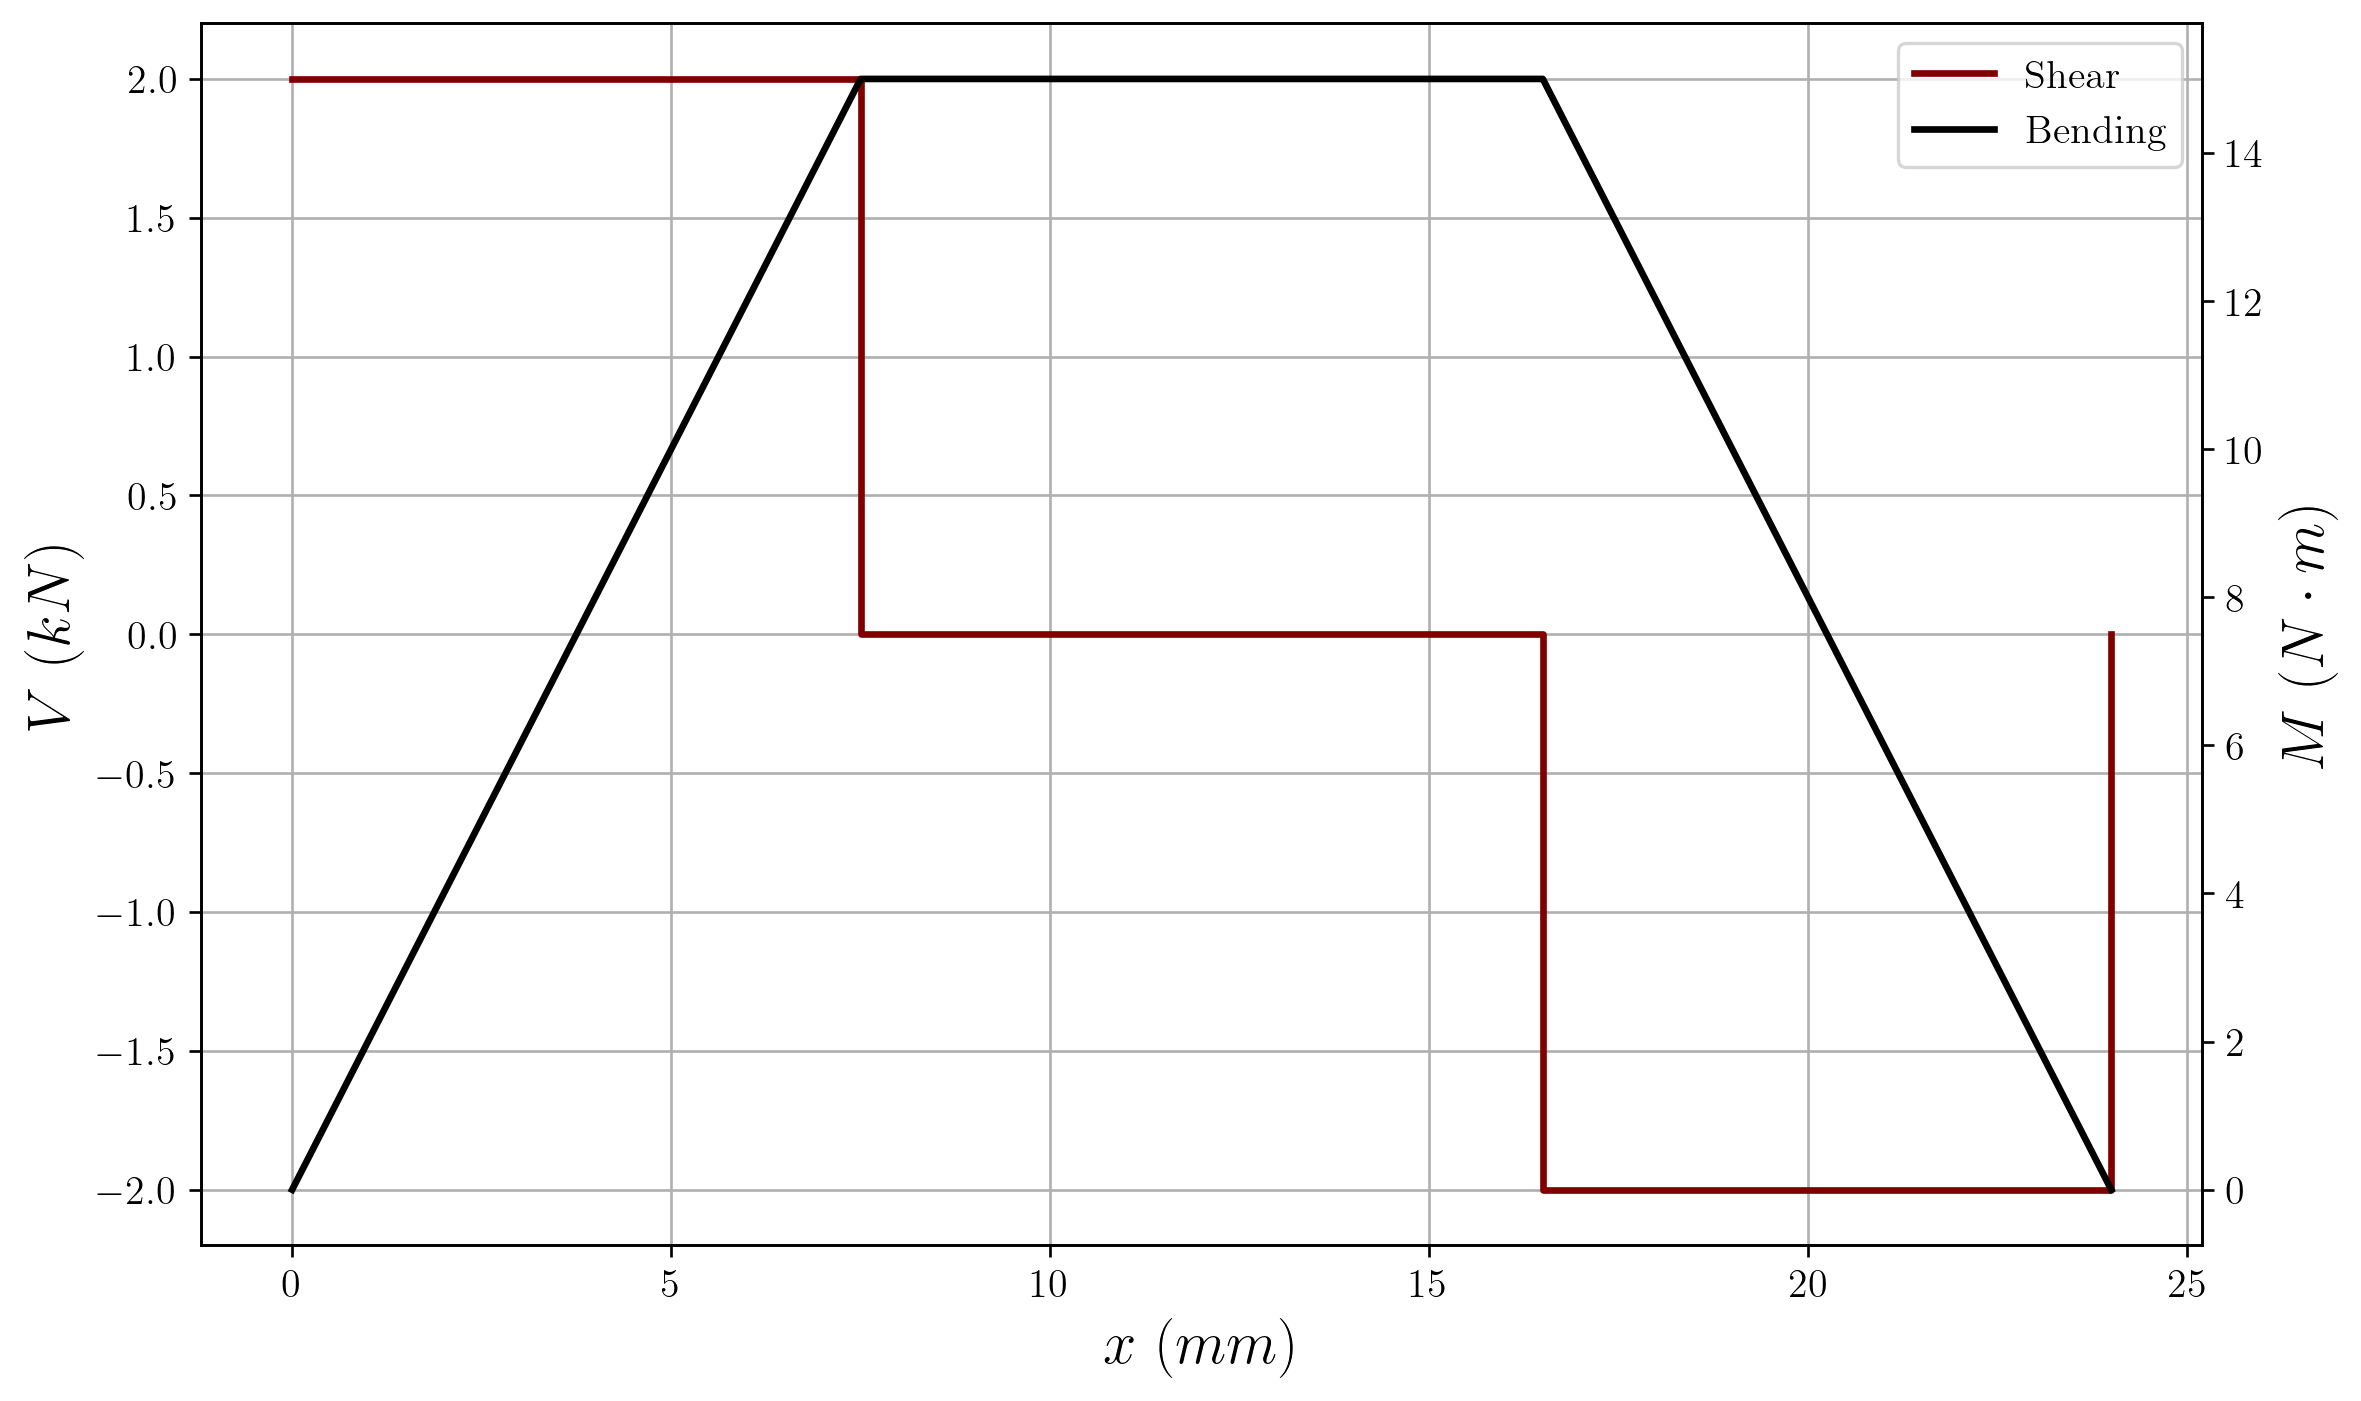

In [12]:
A, B, C, D = x = [0, 7.5, 16.5, 24]
x_shear = [A, B, B, C, C, D, D]
V = [2, 2, 0, 0, -2, -2, 0]
M = [0, 2*7.5, 2*7.5 - 0, 2*7.5 - 2*7.5]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x_shear, V, label='Shear')
ax1.set_xlabel('$x$ ($mm$)')
ax1.set_ylabel('$V$ ($kN$)')

ax2.plot(x, M, label='Bending', color='black')
ax2.set_ylabel(r'$M$ ($N\cdot m$)')
ax2.grid(visible=False)

ax1.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Shear', 'Bending'])
plt.show()

The maximum bending moment is $15\ N\cdot m$, and the maximum shear stress is $\tau_{max}=2000\ N$. The normal and shear stress due to bending is,

$$\sigma_{max}=\frac{Mc}{I}$$
$$I=\frac{1}{4}\pi r^4$$

and for shear, the maximum stress for circular cross-sections is,

$$\tau_{max}=\frac{4}{3}\frac{V}{A}$$

In [13]:
M, c = sp.S(15), sp.S(0.006)
I = sp.S(0.25)*sp.pi*sp.S(0.006)**4
sig_max = M*c/I
sig_max.n()  # in Pa

88419412.8288307

In [14]:
V, A = 2000, sp.pi*sp.S(0.006)**2
tau_max = 4/3*V/A
tau_max.n()  # in Pa

23578510.0876882

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-39
## Given

\begin{center}
\includegraphics{images/fig14}
\end{center}

## Find
For the beam above, find the maximum tensile stress due to $M$ and the maximum shear stress due to $V$.

## Solution
The free body diagram is,

\begin{center}
\includegraphics{images/fig15}
\end{center}

In [15]:
# Getting reaction forces
Ay, By = sp.symbols('A_y B_y')
eq1 = sp.Eq(Ay + By, 1800)
eq2 = sp.Eq(200*Ay, 150*1800)

sol = sp.solve([eq1, eq2], dict=True)[0]
[display(eq) for eq in [eq1, eq2]]
display(Markdown('---'))

for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(A_y + B_y, 1800)

Eq(200*A_y, 270000)

---

Eq(A_y, 1350)

Eq(B_y, 450)

The shear and moment diagram is,

\begin{center}
\includegraphics{images/fig16}
\end{center}

The maximum shear and tensile stress occur at $x=100\ mm$.

In [16]:
# Calculating stress due to bending
M, c = 30_000, sp.S(0.025)
(M*c/(sp.pi/4*c**4)).n()  # in Pa

2444619925.89151

In [17]:
# Calculating the maximum shear stress
V = 750_000
(sp.Rational(4, 3)*V/(sp.pi*c**2)).n()  # in Pa

509295817.894065

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-62 Part A
## Given

\begin{center}
\includegraphics{images/fig17}
\end{center}

The tube is $36\ in$ long and $r_i=r_m=0$. The thickness $t$ is $\frac{1}{16}"$.

## Find
The maximum torque that can be applied and the corresponding angle of twist of the tube.

## Solution
For thin-walled tubes,

$$\tau=\frac{T}{2A_mt}$$
$$\theta_1=\frac{TL_m}{4GA_m^2t}$$

See p. 129 for additional details of the above formulas.

In [18]:
# Calculating the maximum torque
tau_max = 12_000  # lbf in
t = sp.Rational(1, 16)  # thickness in inches
Am = (1 - t)**2
T = tau_max*2*Am*t
T.n()  # lbf in

1318.35937500000

From table A-5, the modulus of rigidity is $11.5\ Mpsi$.

In [19]:
G = 11.5e6
Lm = (1 - t)*4  # total length
L = 36  # inches
phi_1 = T*Lm/(4*G*Am**2*t)*L
(phi_1*180/sp.pi).n()  # in degrees

4.59163394776145

The expression gets multiplied by $L$ because $\theta_1$ is the angle of twist per unit length.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-64
## Given

\begin{center}
\includegraphics{images/fig18}
\end{center}

$c_1=2\ mm$, $L_1=20\ mm$, $c_2=3\ mm$, $L_2=30\ mm$, $c_3=0\ mm$, and $L_3=0\ mm$. The material is steel and the maximum shear is $\tau_{allow}=12\ ksi$. The angle of twist is the same for each section.

## Find
a. Determine the torque transmitted by each leg and the torque transmitted by the entire section.
b. Determine the angle of twist per unit length.

## Solution
The relationship for open looped geometry is,

$$T_i=\frac{\theta_iGL_ic_i^3}{3}$$
$$\tau_{max}=G\theta_ic_{max}$$

From Table A-5, $G_{steel}=79.3\ GPa$. I will find Part B first because it is required to answer Part A.

### Part B

In [20]:
tau_max = sp.S(82.7371e6)  # shear stress in Pa
G = sp.S(79.3e9)  # modulus of rigidity in Pa
c = [sp.S(c_) for c_ in (0.002, 0.003, 0)]  # in m
L = [sp.S(L_) for L_ in (0.02, 0.03, 0)]  # in m
c_max = max(c)

phi_i = tau_max/(G*c_max)
phi_i  # in rad per m

0.347781000420345

### Part A

In [21]:
T = []
for i in range(len(c)):
    T_i = phi_i*G*L[i]*c[i]**3/3
    display(sp.Eq(sp.Symbol(f'T_{i + 1}'), T_i))
    T.append(T_i)
T = sum(T)
display(sp.Eq(sp.Symbol('T'), T))  # torques in N m

Eq(T_1, 1.47088177777778)

Eq(T_2, 7.446339)

Eq(T_3, 0)

Eq(T, 8.91722077777778)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-81
## Given

\begin{center}
\includegraphics{images/fig19}
\end{center}

A countershaft carrying two V-belt pulleys is shown in the figure. Pulley $A$ receives power from a motor through a belt with the belt tensions shown. The power is transmitted through the shaft and delivered to the belt on pulley $B$. Assume the belt tension on the loose side at $B$ is 15 percent of the tension on the tight side.

## Find
a. Determine the tensions in the belt on pulley B, assuming the shaft is running at a constant speed.
b. Find the magnitudes of the bearing reaction forces, assuming the bearings act as simple supports.
c. Draw shear-force and bending-moment diagrams for the shaft. If needed, make one set for the horizontal plane and another set for the vertical plane.
d. At the point of maximum bending moment, determine the bending stress and the torsional shear stress.
e. At the point of maximum bending moment, determine the principal stresses and the maximum shear stress.

## Solution
### Part A
The directions of the torques about $A$ and $B$ are,

\begin{center}
\includegraphics{images/fig20}
\end{center}

Since the shaft has no angular acceleration, $T_A=T_B$ (with directions shown above). It should also be noted that $T_1$ must be greater than $T_2$ because the torque shows that the pulley is more tensile at the bottom.

In [22]:
# Solving for T1 and T2
T1, T2 = sp.symbols('T_1 T_2')
T_A = 4*(sp.S(300) - 50)
eq1 = sp.Eq(3*(T1 - T2), T_A)
eq2 = sp.Eq(T2, sp.S(0.15)*T1)

[display(eq) for eq in [eq1, eq2, Markdown('---')]]

sol = sp.solve([eq1, eq2], dict=True)[0]
_ = [display(sp.Eq(key, value)) for key, value in sol.items()]

Eq(3*T_1 - 3*T_2, 1000)

Eq(T_2, 0.15*T_1)

---

Eq(T_1, 392.156862745098)

Eq(T_2, 58.8235294117647)

### Part B

In [23]:
# Solving for the reactions
Oy, Oz, Cy, Cz = sp.symbols('O_y O_z C_y C_z')

eq1 = sp.Eq(300 + 50 - Oy - Cy, 0)  # Forces in y direction
eq2 = sp.Eq(sol[T1] + sol[T2] - Oz - Cz, 0)  # Forces in z direction
eq3 = sp.Eq(8*sp.S(350) - Cy*22, 0)  # Moments about z-axis
eq4 = sp.Eq(-16*(sol[T1] + sol[T2]) + Cz*22, 0)  # Moments about the y-axis

sol2 = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
[display(eq) for eq in [eq1, eq2, eq3, eq4, Markdown('---')]]
_ = [display(sp.Eq(key, value)) for key, value in sol2.items()]

Eq(-C_y - O_y + 350, 0)

Eq(-C_z - O_z + 450.980392156863, 0)

Eq(2800 - 22*C_y, 0)

Eq(22*C_z - 7215.6862745098, 0)

---

Eq(C_y, 127.272727272727)

Eq(O_y, 222.727272727273)

Eq(C_z, 327.985739750445)

Eq(O_z, 122.994652406418)

### Part C
The shear and moment diagram for the two planes is,

\begin{center}
\includegraphics{images/fig21}
\end{center}

### Part D

In [24]:
# Getting max bending moment
# At A,
M_A = sp.sqrt(1781.818181818181818**2 + 983.9572195**2)
M_B = sp.sqrt(763.6363636363**2 + 1967.914439**2)
sp.Matrix([M_A, M_B])

Matrix([
[2035.44782366535],
[2110.88316471859]])

The maximum bending moment occurs at point B with a value of $2110.88316471859\ lbf\,in$.

In [25]:
# Getting the bending stress
c = sp.S(0.5)
sig_x = (M_B*c/(sp.pi/4*c**4)).n()
sig_x  # psi

21501.2793570833

In [26]:
# Getting the torsional stress
t_xz = (1000*c/(sp.pi/2*c**4)).n()
t_xz  # in psi

5092.95817894065

### Part E

In [27]:
mohr(sig_x, 0, t_xz)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 10750.6396785417)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 11895.9857309209)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 22646.6254094625)

Eq(Eq(\sigma_2, C - R), -1145.3460523792)

Eq(Eq(\tau_1, R), 11895.9857309209)

Eq(Eq(\tau_2, -R), -11895.9857309209)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 25.348569568567)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-95
## Given

\begin{center}
\includegraphics{images/fig22}
\end{center}

The cantilevered bar in the figure is made from a ductile material and is statically loaded with $F_y=250$ lbf and $F_x=F_z =0$. Analyze the stress situation in the small diameter at the shoulder at A.

## Find
a. Determine the precise location of the critical stress element at the cross section at $A$.
b. Sketch the critical stress element and determine the magnitudes and directions for all stresses acting on it.
c. For the critical stress element, determine the principle stresses and the maximum shear stress.

## Solution
### Part A
The critical stress element will be at the top or bottom ($y=\pm0.5\ in$) because both the bending stress and shear stress are maximized at the farthest distance away from the neutral axis.

### Part B
The series of calculations are,

In [28]:
T = sp.S(250)*12  # torque in lbf in
c = sp.S(0.5)
t_xz = (T*c/(sp.pi/2*c**4)).n()
t_xz  # shear in psi

15278.8745368220

In [29]:
M = 11*250
sig_x = (M*c/(sp.pi/4*c**4)).n()
sig_x  # sigma in psi

28011.2699841736

In [30]:
t_trans = (sp.Rational(4, 3)*250/(sp.pi*c**2)).n()
t_trans  # in psi

424.413181578388

The transverse shear ($\tau_{xy}$) may be neglected because it is an order of magnitude smaller than the other values. Here is the stress element diagram,

\begin{center}
\includegraphics{images/fig23}
\end{center}

### Part C

In [31]:
mohr(sig_x, 0, t_xz)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 14005.6349920868)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 20726.8381246034)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 34732.4731166902)

Eq(Eq(\sigma_2, C - R), -6721.20313251659)

Eq(Eq(\tau_1, R), 20726.8381246034)

Eq(Eq(\tau_2, -R), -20726.8381246034)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 47.4895529219991)